# 第四章
## フリーデータを用いた実際の前処理
本章では先に紹介したライブラリを使い、実際のデータに対して前処理を行います。  
使用するデータは歴史的にも有名な難破船タイタニック号への乗客者の生存状況を示す表形式のデータです。  
タイタニック号が沈没しても生還した乗客が一定数いましたが、とあるグループの人々は他のグループよりも  
生還した可能性が高かったようです。  
このデータからどのような人々が生還した可能性が高いのか予測をするために前処理を実践していきます。  

## 前処理とは
データ分析を行う際にそのデータ自体が整備されておらず、抜け漏れや不整合があると分析結果に隔たりが出てしまい品質の低下を招きます。  
また機械学習をする際にもデータにNullが存在する、数値型以外のデータ型があると処理ができないなどの場合もありデータ加工が必要になります。  
前処理には予め決められた処理順序や手段はないため、データを観察して特性を把握し変数同士の相関や値の分布を可視化、  
データに応じた加工をすることが求められます。
よって、本演習では実際の前処理の一例として紹介するものになります。

### フリーデータのセット
はじめに必要なライブラリをインポートします。

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  

インポートしたPythonのデータライブラリであるseabornからtitanicのデータを読み込みます。

In [2]:
titanic = sns.load_dataset('titanic')

本演習では一部カラムは使用しないため予め除外しておきます。

In [3]:
titanic = sns.load_dataset('titanic')
titanic = titanic.drop(['class','who','embark_town','alive','alone'], axis=1)

### データ内の各変数説明
survived --- 生還フラグ(1:生存、0:死亡)  
pclass --- チケット等級  
sex --- 性別(male、female)  
age --- 年齢  
sibsp --- 同乗している兄弟または配偶者の数  
parch --- 同乗している親または子の数  
fare --- チケット料金  
embarked --- 乗船した港  
adult_male --- 成人男性であるかどうか(True:成人男性、False:成人男性以外)  
deck --- 乗船デッキ  

### データの観察
扱うデータの準備ができたので、まずはデータを加工するためにデータを観察します。  
これまでの章でも説明してきたグラフによる可視化や欠損値への対処などいずれの処理をするにも  
データの規模、データ型、重複した情報の有無など様々なことを考慮する必要があります。  
従って、様々な視点でデータを観察していきます。  

#### 行、列数の確認
セットしたデータフレーム名を指定するだけでデータの中身の抜粋と行列数を確認できます。  
行列数のみを確認するにはshapeを使います。

In [4]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,deck
0,0,3,male,22.0,1,0,7.2500,S,True,NaN
1,1,1,female,38.0,1,0,71.2833,C,False,C
2,1,3,female,26.0,0,0,7.9250,S,False,NaN
3,1,1,female,35.0,1,0,53.1000,S,False,C
4,0,3,male,35.0,0,0,8.0500,S,True,NaN
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,True,NaN
887,1,1,female,19.0,0,0,30.0000,S,False,B
888,0,3,female,NaN,1,2,23.4500,S,False,NaN
889,1,1,male,26.0,0,0,30.0000,C,True,C


In [5]:
titanic.shape

(891, 10)

#### データ型の確認
info()を使うことでデータ型と各列のデータが欠損していない数を確認できます。   
列ごとのデータ型のみを確認するにはdtypesを使います。  

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         714 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    889 non-null    object  
 8   adult_male  891 non-null    bool    
 9   deck        203 non-null    category
dtypes: bool(1), category(1), float64(2), int64(4), object(2)
memory usage: 57.9+ KB


In [8]:
titanic.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
adult_male        bool
deck          category
dtype: object

#### 統計量の確認
Pandasのdescribe()メソッドを使いデータ全体の統計量を確認します。  
describe()だけではintやfloatなどの数値型のみが表示されます。  

In [6]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


データ型に応じて取得できる統計が異なり、数値型では"mean"が平均値、"std"が標準偏差、"50%"が中央値など表示されます。  
今後の予測の目的となるsurvived列の平均値は約0.38とあるので全体の約4割近くが生還したと考えられます。  
age列の中央値が28、最小値が1以下、最大値が80と幅広い年齢層が乗船していたことが分かります。  
また、fare列の最大値が約512と平均値の約32から大きく離れているので、fare列の値の扱いには注意が必要そうです。  
数値型以外の統計量を表示するにはexclude='number'と指定します。

In [7]:
titanic.describe(exclude='number')

,sex,embarked,adult_male,deck
count,891,889,891,203
unique,2,3,2,7
top,male,S,True,C
freq,577,644,537,59


文字列型では平均値や標準偏差が計算できない代わりに、最頻値を示す"top"、その最頻値が出現する回数を示す"freq"などが表示されます。  
sex列の最頻値maleが577回と、全体に対して約65%を占めているので男性の乗客の方が女性よりも多いことが分かります。  
deck列はデータ数が203と少なく、欠損値が多いことが分かります。

#### 欠損値の確認
Pandasのisnull()メソッドを使い各列の欠損値の個数を確認します。

In [8]:
titanic.isnull().sum()

survived        0
pclass          0
sex             0
age           177
sibsp           0
parch           0
fare            0
embarked        2
adult_male      0
deck          688
dtype: int64

isnull()メソッドによりデータフレームの要素が欠損値の場合はTrue、欠損していない場合はFalseとなります。  
これにsum()を追加することで、欠損値「True」の数をカラム毎に集計したものが上記の結果です。

In [9]:
titanic.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,deck
0,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,True
887,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,True
889,False,False,False,False,False,False,False,False,False,False


deck列が全レコード数に対して8割近くの数が欠損していると確認できます。  
age列も2割程度のレコードが欠損していますが、他の欠損値がある列も平均値や最頻値などで補完ができそうです。  
  
この後もデータ観察や可視化をしていきますが、その上で欠損値があると正しくデータの特徴を捉えることが難しくなるので  
今回はdeck列を削除してしまい、分析対象から除外します。

In [10]:
tita=titanic.drop(["deck"],axis=1)

In [11]:
tita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    object 
 3   age         714 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    889 non-null    object 
 8   adult_male  891 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 56.7+ KB


#### 相関係数の確認
Pandasのcorr()を使うことで各列の間の相関係数が算出されます。  
1に近いほど「正の相関が強い」、-1に近いほど「負の相関が強い」という関係になります。  
相関を算出する対象のデータ型には文字列型が含まれないため、相関を見るには文字列型を数値型へ変換するなど対処が必要になってきます。

In [12]:
tita.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000


### データの可視化と加工
数値や文字の羅列だけでは扱っているデータの特徴が掴み辛いです。  
各列におおよそどのようなデータがあるのかは見えてきましたが、具体的な値のバラつきや傾向を把握するにはデータの可視化が効果的です。  
本章前半に紹介してきたライブラリを使い、ここまで観察してきたデータフレームを実際に可視化していきます。  
また、様々な観点での考察が重要なため必要に応じてデータの加工も合わせて行います。  
先ほどの相関係数が見られるカラムを追加するためデータ型をobject型からint型に置き換えます。  
元の列は残してsex列がmaleの時は0を、それ以外の時は1をsex_num列に入力しデータフレームへ列を追加します。  

In [13]:
tita['sex_num'] = np.where(tita['sex']=='male', 0, 1)
tita.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,sex_num
0,0,3,male,22.0,1,0,7.2500,S,True,0
1,1,1,female,38.0,1,0,71.2833,C,False,1
2,1,3,female,26.0,0,0,7.9250,S,False,1
3,1,1,female,35.0,1,0,53.1000,S,False,1
4,0,3,male,35.0,0,0,8.0500,S,True,0


sex_num列が追加されたことが確認できます。続けてembarked列も同様に数値に置き換えます。  
ただし、embarked列には欠損値があるのでこのまま同様の型変換をした場合、追加した列にも欠損が生じてしまいます。  
そのため、型変換をする前に欠損値を補完しておきます。  
embarked列はobject型なので今回は最頻値で補完してみます。value_counts()を使い列の出現データと最頻値を確認します。  

In [14]:
print(tita["embarked"].value_counts())

S    644
C    168
Q     77
Name: embarked, dtype: int64


出現データはS、C、Qの3つで最頻値がSであることが分かったので、Pandasのfillnaを使い欠損値にはSを入力します。

In [15]:
tita.fillna({"embarked":"S"},inplace=True)
print(tita["embarked"].value_counts())

S    646
C    168
Q     77
Name: embarked, dtype: int64


欠損値2つがSで補完されたことが確認できます。
ここで型変換のためmap関数を使いembarked列の値がSのときは0、Cのときは1、Qのときは2をembarked_num列に入力しデータフレームへ列を追加します。

In [16]:
tita['embarked_num'] = tita['embarked'].map({'S':0, 'C':1, 'Q':2})
tita.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,sex_num,embarked_num
0,0,3,male,22.0,1,0,7.2500,S,True,0,0
1,1,1,female,38.0,1,0,71.2833,C,False,1,1
2,1,3,female,26.0,0,0,7.9250,S,False,1,0
3,1,1,female,35.0,1,0,53.1000,S,False,1,0
4,0,3,male,35.0,0,0,8.0500,S,True,0,0
5,0,3,male,NaN,0,0,8.4583,Q,True,0,2
6,0,1,male,54.0,0,0,51.8625,S,True,0,0
7,0,3,male,2.0,3,1,21.0750,S,False,0,0
8,1,3,female,27.0,0,2,11.1333,S,False,1,0
9,1,2,female,14.0,1,0,30.0708,C,False,1,1


embarked_num列が追加され、意図した数値が追加した列に入力されていることが確認できます。  
先ほどのようにcorr()で簡単に相関係数が見れますが、seaborn.heatmapメソッドを使い色の濃淡や色相でデータの可視化をしていきます。  
annot=Trueを指定することで相関係数が表示され、cmapで任意のカラーマップを指定して視覚的により一層データを解釈しやすくできます。  
今回のカラーマップでは白色に近いほど正の相関を表し、黒色に近いほど負の相関を表します。

<AxesSubplot:>

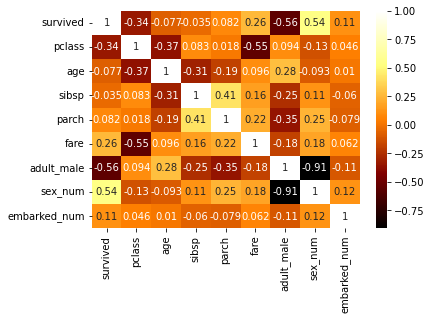

In [17]:
sns.heatmap(tita.corr(), annot=True, cmap='afmhot')

この結果からsurvived列とsex_num列には正の相関が強いことが見えてきます。  
adult_male列とsex_num列、survived列とadult_male列には負の相関が強いことが分かります。  
つまり性別や年齢によって生還する確率が変わってくる可能性が想定できます。

#### 箱ひげ図
データの分布やバラつきをグラフで表示します。  
統計量の確認で各列のサマリを見ましたが、ここでは具体的に列を絞って箱ひげ図を見てみます。  
まずは統計量を確認した時にfare列の最大値が著しく大きかったのでこれを見てみます。

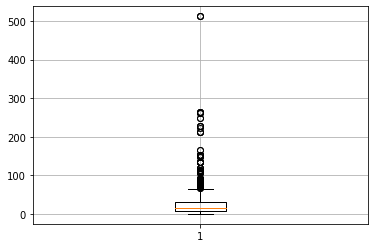

In [18]:
plt.figure()
plt.grid()
plt.boxplot(tita["fare"])
plt.show()

fare列の最大値512は第三四分位数からも大きく離れていることが分かります。この最大値は外れ値として考えた方がよさそうです。  
同様にage列も箱ひげ図を見てみます。  

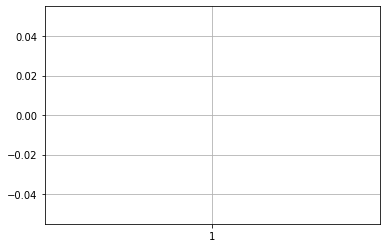

In [19]:
plt.figure()
plt.grid()
plt.boxplot(tita["age"])
plt.show()

age列には欠損値があったため箱ひげ図が表示されませんでした。  
このような場合はPandasのdropnaを使い欠損値を除外して扱うか、欠損値を補完することになります。
まずはage列の欠損値を除外してグラフを表示してみます。

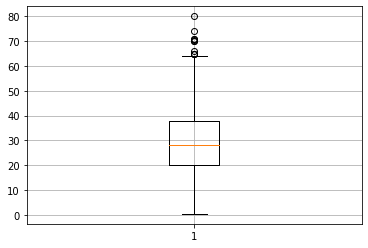

In [20]:
plt.figure()
plt.grid()
plt.boxplot(tita['age'].dropna())
plt.show()

次はage列のデータ型はfloat64なので欠損は平均値で補完してから表示してみます。  
前段で紹介したPandasのfillnaメソッドを使い定数を指定して補完する以外にも、指定列の平均値、中央値、最大値などを指定して補完することができます。

In [21]:
tita["age"] = tita["age"].fillna(tita["age"].mean())
tita.isnull().sum()

survived        0
pclass          0
sex             0
age             0
sibsp           0
parch           0
fare            0
embarked        0
adult_male      0
sex_num         0
embarked_num    0
dtype: int64

age列の欠損値が補完できたので、改めて箱ひげ図を表示してみます。

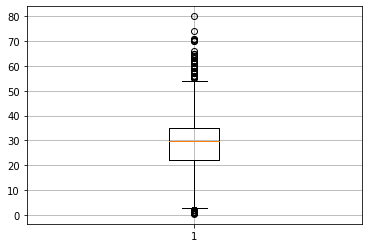

In [22]:
plt.figure()
plt.grid()
plt.boxplot(tita['age'].dropna())
plt.show()

177個の欠損値を平均値の約29で補完したことにより、四分位数が変化しました。  
補完の仕方によって別の特徴に変化する可能性もあるため、欠損をどのように扱うかは慎重に行うべきだということが分かります。  
今回はこのまま欠損値を平均値で補完したまま進めていきます。

#### 散布図
先ほど見たage列とfare列の関係を見るための分布をPandasのplot.scatterメソッドを使い描写します。

<AxesSubplot:xlabel='age', ylabel='fare'>

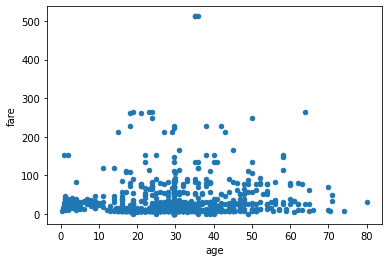

In [23]:
tita.plot.scatter(x='age', y='fare')

いずれの年代でもfareが100未満の人が集中していることが確認できます。  
fareが100以上である年代もまばらです。また、箱ひげ図で確認できた外れ値は30半ばの人だというのが分かります。  
このグラフにsurvivedの要素を加えた場合も見てみます。

<AxesSubplot:xlabel='age', ylabel='fare'>

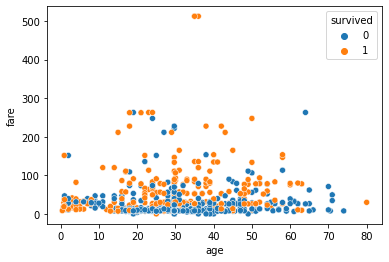

In [24]:
sns.scatterplot(x='age', y='fare', hue='survived', data=tita)

外れ値を抜きにして見てもfareが大きいほど、ageが小さいほど生還している乗客が多いように見えます。

#### 棒グラフ
列の特性を更に詳しく見るため、数値の高低差が表現できる棒グラフでそれぞれの列を描写してみます。  
まずは各列でグルーピングしsurvivedの平均値、すなわちその列における生存率を表示して傾向を見ます。  
棒グラフはseabornのcountplotで各列の出現文字列の数をカウントし、各軸をsurvivedで分割して集計し縦方向に表示します。  
はじめにsex列を対象に見ていきます。

sex
female    0.74
male      0.19
Name: survived, dtype: float64


<AxesSubplot:xlabel='sex', ylabel='count'>

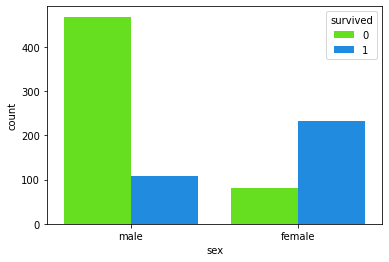

In [25]:
print(tita.groupby('sex')['survived'].mean().round(2))
sns.countplot(x='sex', hue='survived', data=tita, palette='gist_rainbow')

female(女性)の方がmale(男性)よりも生還した乗客が多いです。  
乗客の総数は男性の方が多いので、女性の方が優先して救助されたことなどが想定できます。  
次にpclass列を対象に見てみます。

pclass
1    0.63
2    0.47
3    0.24
Name: survived, dtype: float64


<AxesSubplot:xlabel='pclass', ylabel='count'>

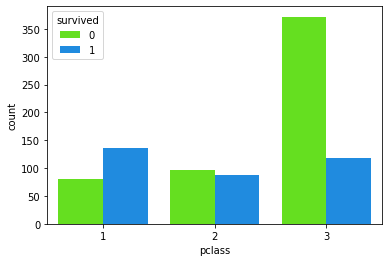

In [26]:
print(tita.groupby('pclass')['survived'].mean().round(2))
sns.countplot(x='pclass', hue='survived', data=tita, palette='gist_rainbow')

チケット等級は3 ＜ 2＜ 1 と上がるほど乗客の生還率が高いようです。  
1等級と2等級では半数近くが生還していますが、3等級では25%程度なのでチケット等級が高い方が優先的に救助されたことなど想定できます。  
次はembarked列を対象に見てみます。

embarked
C    0.55
Q    0.39
S    0.34
Name: survived, dtype: float64


<AxesSubplot:xlabel='embarked', ylabel='count'>

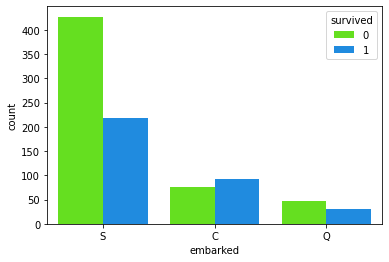

In [27]:
print(tita.groupby('embarked')['survived'].mean().round(2))
sns.countplot(x='embarked', hue='survived', data=tita, palette='gist_rainbow')

乗船した港がCだと半数以上が生還していますが母数が少ないため、傾向を掴むのが難しいです。  
視点を変えてsibsp列を見てみます。

sibsp
0    0.35
1    0.54
2    0.46
3    0.25
4    0.17
5    0.00
8    0.00
Name: survived, dtype: float64


<AxesSubplot:xlabel='sibsp', ylabel='count'>

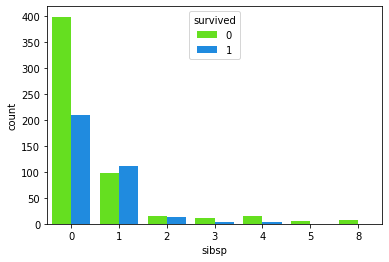

In [28]:
print(tita.groupby('sibsp')['survived'].mean().round(2))
sns.countplot(x='sibsp', hue='survived', data=tita, palette='gist_rainbow')

同乗している兄弟や配偶者の数が1～2だと生還した乗客が多く、それ以外は少ない傾向が見えます。  
例えば、sibspの1が夫婦での乗船客で大半を占めていた場合はそのうちの半数近くが女性になるので生還率が高くなると考えられます。  
続けてparch列も見てみます。

parch
0    0.34
1    0.55
2    0.50
3    0.60
4    0.00
5    0.20
6    0.00
Name: survived, dtype: float64


<AxesSubplot:xlabel='parch', ylabel='count'>

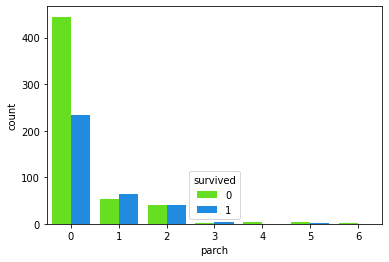

In [29]:
print(tita.groupby('parch')['survived'].mean().round(2))
sns.countplot(x='parch', hue='survived', data=tita, palette='gist_rainbow')

同乗している親や子の数は1～3だと生還した乗客が多いようですが、全乗客の内3割程度に対する傾向なため情報が乏しいです。  
これも違う観点で見ていった方がよさそうです。

#### データのビニング
ここまでのようにage列(年齢)とsurvived列(生還)の関係性を見ていきます。  
今回はage列を0以上10未満、10以上20未満のように10毎の範囲で区切り、区切られた範囲に対しての生還の関係を見てみます。  
データフレームに対してage_range列を追加し、ageが0以上10未満の場合は0、10以上20未満の場合は1のようにage_range列へ入力します。

In [30]:
tita['age_range'] = tita['age'] // 10
tita.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,sex_num,embarked_num,age_range
0,0,3,male,22.0,1,0,7.2500,S,True,0,0,2.0
1,1,1,female,38.0,1,0,71.2833,C,False,1,1,3.0
2,1,3,female,26.0,0,0,7.9250,S,False,1,0,2.0
3,1,1,female,35.0,1,0,53.1000,S,False,1,0,3.0
4,0,3,male,35.0,0,0,8.0500,S,True,0,0,3.0


<AxesSubplot:xlabel='age_range', ylabel='Count'>

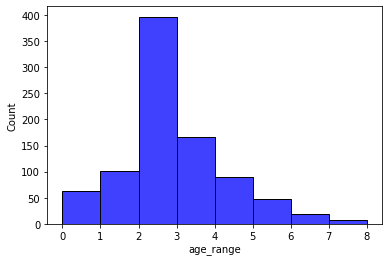

In [31]:
sns.histplot(tita['age_range'], binwidth=1, color='blue')

そしてage_rage列ごとにsurvived列の値の件数をcountした棒グラフを生成すると以下のようになります。

age_range
0.0    0.61
1.0    0.40
2.0    0.32
3.0    0.44
4.0    0.38
5.0    0.42
6.0    0.32
7.0    0.00
8.0    1.00
Name: survived, dtype: float64


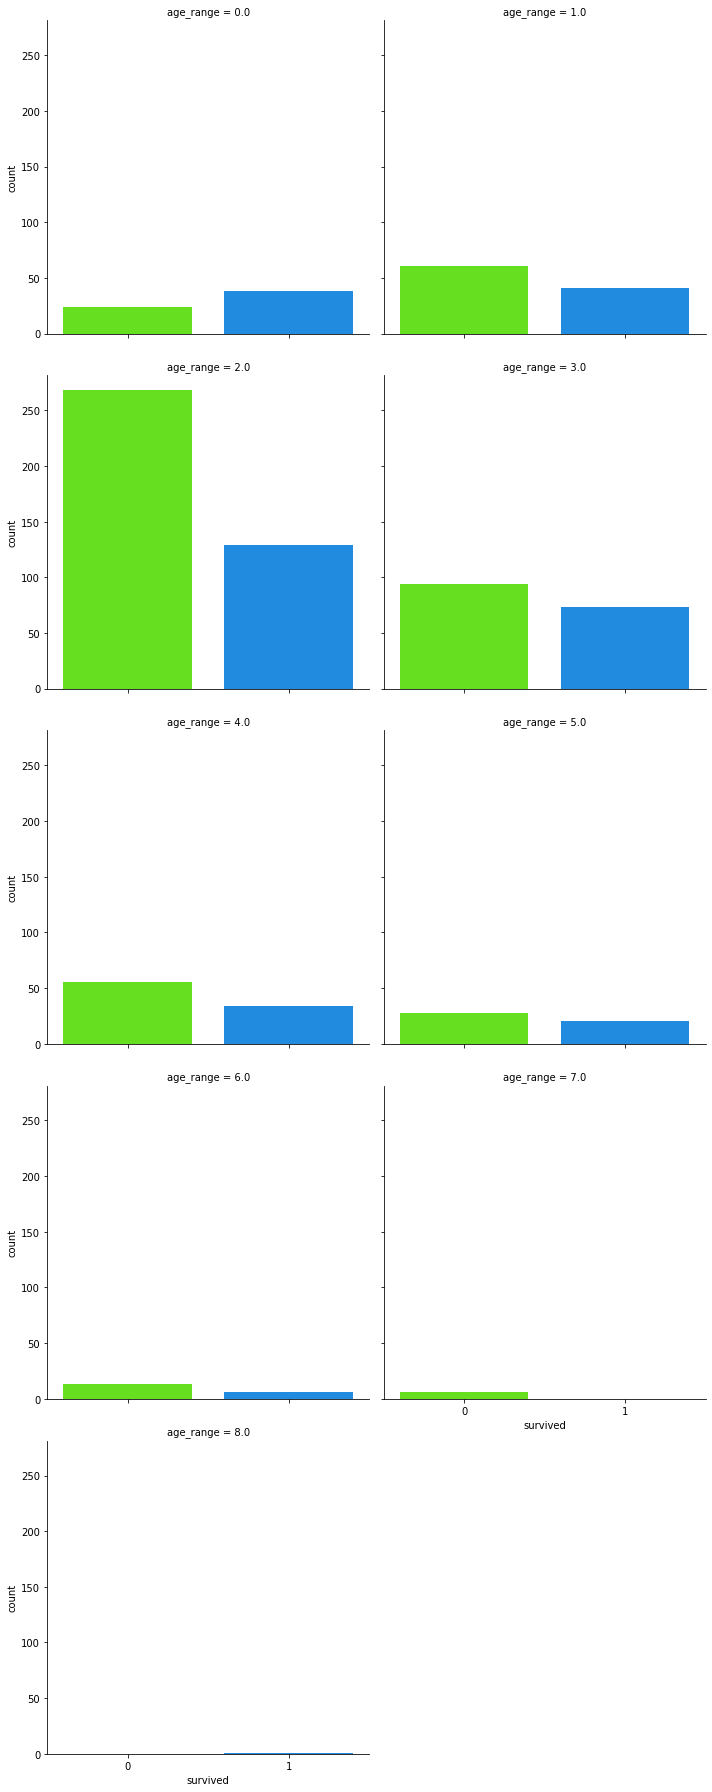

In [32]:
print(tita.groupby('age_range')['survived'].mean().round(2))
sns.catplot(x='survived', col='age_range', kind='count', data=tita, col_wrap=2, palette='gist_rainbow')

生還した数(survivedが1)は年齢が0～10代までと30～50代までは比較的多く、20代と60～70台はおおよそ半々くらいのようです。  
これを更に深掘りして男女別(sex列)での違いがあるのか先ほどのグラフにsex列の要素を追加してみます。

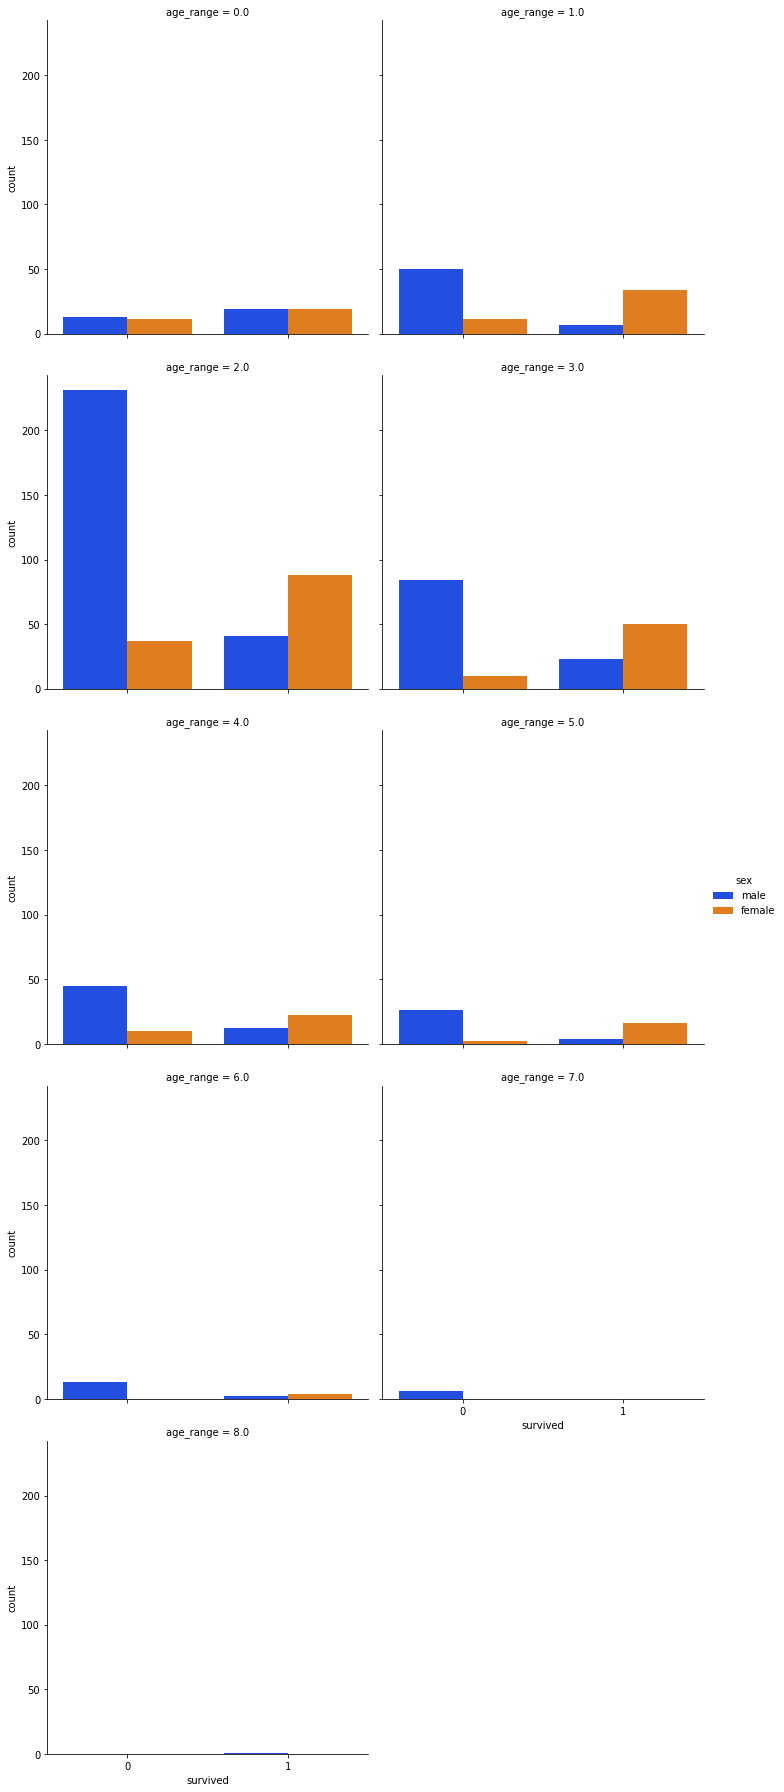

In [37]:
sns.catplot(x='survived', col='age_range', kind='count', hue='sex', data=tita, col_wrap=2, palette='bright')

age_rangeごとに1つのグラフが生成され、グラフの左半分がsurvivedが0(死亡)の件数で右半分が1(生存)の件数です。  
青色がmale(男性)で橙色がfemale(女性)を示しています。  
いずれの年代においても女性の生還率が高いことが見て取れます。  
age列に関して欠損値を平均値(約29.7)で177個の値が補完したこともあり、20代の値が顕著に件数が多くなっています。  
この補完により元データから大きく内容が変わってしまったとも考えられます。

### まとめ
ここまでデータの観察/加工/可視化をやってみることで以下のようなデータの特性が見えてきました。  

【見えてきた特性】  
- 生還の有無(survived列)と性別(sex列)には正の相関が強い
- 乗船していたデッキ(deck列)はレコード全体の8割が欠損している
- 乗船料金(fare列)には外れ値が存在している
- 乗船料金(fare列)が高いほど生還する傾向が見られる
- 性別(sex列)が女性(female)だと年齢を問わず生還した傾向がある
- 年齢(age列)に欠損値があり補完する値で特性が変わる可能性がある
- 年齢(age列)と性別(sex列)の組み合わせで生還する傾向に変化が見られる

今回の演習で紹介した以外にも様々な角度から前処理を行うことが、より品質の高いデータ分析へとつながっていきます。